In [ ]:
# Abigail Glover
# Homework 7
# October 26, 2023

In [1]:
# Import code from hw6

# UPDATED 31 Oct 2023 by Abigail Glover


# Import libraries
import numpy as np
from astropy.io import fits
import rdpharo_win
import os
import sys
import random
import sympy
import math

# Print problem statement
#print('Problem 2')

# Define variables
R = 3  # Read noise in photoelectrons
N_star = 900  # Number of photoelectrons per second
t1 = 5  # Exposure time in seconds
S = 13  # Number of pixels
p = 1  # Number of pixels

# Number of exposures
N_exposures1 = 10 

# Calculate SNR for one exposure
SNR_one_exposure = (N_star * t1) / math.sqrt(N_star * t1 + S * p * t1 + p * R**2)

# Calculate total SNR for all exposures
SNR_total = math.sqrt(N_exposures1) * SNR_one_exposure

# Print the expression for the SNR
#print('\nThe expression to find the SNR for the sum of all signals (with the same conditions) over multiple exposures is:')
#print('SNR = N_exposures * (N_star * t)/sqrt(N_star * t + S * p * t + p * R^2)')
#print('\nThe expression to find the SNR for the sum of all signals (with varying conditions) over multiple exposures is:')
#print('SNR = sigma[ (N_star * t)/sqrt(N_star * t + S * p * t + p * R^2) ]')

# Question
#print('\n\nWhat is the SNR if you take ten 5-second exposures?')

# Answer
#print(f"The SNR for ten 5-second exposures is: {SNR_total : .2f}")

# Update variables
t2 = 50 # Exposure time in seconds
N_exposures2 = 1

# Calculate SNR for updated exposure
SNR_one_exposure2 = (N_star * t2) / math.sqrt(N_star * t2 + S * p * t2 + p * R**2)

# Calculate total SNR for all updated exposures
SNR_total2 = math.sqrt(N_exposures2) * SNR_one_exposure2

# Question
#print('\n\nHow about when taking just one 50-second integration?')

#Answer
#print(f"The SNR for one 50-second exposure is: {SNR_total2 : .2f}")

# Question
#print('\n\nWhich is better and why?')

# Answer
#print('A single, longer exposure is better than multiple short exposures.')
#print('This is because a longer exposure allows more time for light from\n\
#faint, deep-sky objects to be gathered, typically resulting in clearer,\n\
#more detailed images in darker areas than short exposures provide.')

# Question
#print('\n\nWhat are some other practical considerations (pro or con) besides just the hypothetical SNR?')

# Answer for short exposures
#print('Considerations for short exposures:')
#print('- PRO: Taking multiple short exposures reduces the risk of losing the entire (or most of the) data set.')
#print('- PRO: It is easier to gather calibration frames from short exposures')
#print('- PRO: There is less risk of oversaturating the pixels with short exposures')
#print('- CON: Greater demand for data management.')
#print('- CON: May not be an effective use of telescope time')
#print('- CON: There is more noise in the data')

# Answer for long exposures
#print('\nConsiderations for long exposures:')
#print('- PRO: Noise is minimized')
#print('- PRO: Can be a more efficient use of telescope time')
#print('- PRO: Better signal-to-noise ratio')
#print('- PRO: Provides more information (more data) from darker objects')
#print('- CON: May cause oversaturation in pixels depending on the observed object')
#print('- CON: Increased risk of higher data loss if something is corrupt')
#print('- CON: More difficulty in gathering calibration frames')

#print('\nNote: There is no one answer for which exposure is better. Often, a combination\n\
#of the two is used by professionals depending on their research needs.')

# Question
#print('\n\nNote that the CCD Equation in Howell is for calculating one frame’s SNR.')
#print('How would you modify it for multiple exposures?')

# Answer
#print('To account for more than one exposure with the same conditions, I multiplied the number\n\
#of exposures by the SNR equation for a single frame to get the total SNR value.')


# In[51]:


# Print problem statement
#print('Problem 3')
#print('Part a.)')

# Data directory name
datadir = "hw6_data/"

# FITS extension string (including the dot, e.g., ".fits")
fext = ".fits"

# Print statement to let user know what has been done
#print('\nData directory name assigned.')
#print('FITS extension assigned to variable')


# In[52]:


# Print problem statement
#print('\nPart b.)\n')

# Initialize empty lists for objects and darks
objfile = []
darkfile = []

# List all files in the data directory
file_list = os.listdir(datadir)

# Iterate through the file names and categorize them
for file_name in file_list:
    
    # Check if the file starts with "stars_13s_"
    if file_name.startswith("stars_13s_"):
        
        # Remove the ".fits" extension and add to the objects list
        objfile.append(file_name.replace(fext, ""))
        
    # Check if the file starts with "dark_13s_"
    elif file_name.startswith("dark_13s_"):
        
        # Remove the ".fits" extension and add to the darks list
        darkfile.append(file_name.replace(fext, ""))

# Print the lists (as a check to make sure they were correctly sorted)
#print("Object Files:")
#print(objfile)
#print("\nDark Files:")
#print(darkfile)

# Print statement to let user know what has been done
#print('Files have been sorted.')


# In[77]:


# Print problem statement
#print('\nPart c.)\n')

# Print informative statements
#print("Data directory: " + datadir)
#print("FITS extensions: " + fext)

# Print the last elements of objfile and darkfile
#if objfile:
#    print("Last object file: " + objfile[-1])
#else:
#    print("No object files found.")
#if darkfile:
#    print("Last dark file: " + darkfile[-1])
#else:
#    print("No dark files found.")


# In[54]:


# Print problem statement
#print('\nPart d.)\n')

# Choose a random file
random_object_file = random.choice(objfile)

# Construct the full path to the random file
random_object_file_path = os.path.join(datadir, random_object_file + ".fits")

# Use rdpharo_win to read the data and header
header, data = rdpharo_win.rdpharo(random_object_file_path)

# Unpack the data from the array
ny, nx = data.shape[0], data.shape[1]

# Question does not ask for print statements 
# Print a statement letting user know it was successfully ran
#print('Data array sizes have been determined.\n')


# In[55]:


# Print problem statement
#print('\nPart e.)\n')

# Define variables
nobj = len(objfile)
ndark = len(darkfile)

# print ny, nx, nobj, and ndark
#print(f"Data array size (ny): {ny}")
#print(f"Data array size (nx): {nx}")
#print(f"Number of files in objfile: {nobj}")
#print(f"Number of files in darkfile: {ndark}")


# In[56]:


# Print problem statement
#print('\nProblem 4')
#print('Part a.)\n')

# Allocate 3D float arrays 
objects_array = np.zeros((nobj, ny, nx), dtype=float)
darks_array = np.zeros((ndark, ny, nx), dtype=float)

# Print the shapes of the arrays
#print("Shape of objects array:", objects_array.shape)
#print("Shape of darks array:", darks_array.shape)


# In[85]:


# Print problem statement
#print('\nPart b.)\n')

# Initialize header variables
objhead = None
darkhead = None

# Read data into the arrays
# For objects
for i, obj_filename in enumerate(objfile):
    obj_path = os.path.join(datadir, obj_filename + ".fits")
    obj_output = rdpharo_win.rdpharo(obj_path)

    if len(obj_output) == 2:
        obj_header, obj_data = obj_output
        objects_array[i] = obj_data
        objhead = obj_header
    else:
        print(f"Error reading object file: {obj_filename}")

# For darks
for j, dark_filename in enumerate(darkfile):
    dark_path = os.path.join(datadir, dark_filename + ".fits")
    dark_output = rdpharo_win.rdpharo(dark_path)

    if len(dark_output) == 2:
        dark_header, dark_data = dark_output
        darks_array[j] = dark_data
        darkhead = dark_header
    else:
        print(f"Error reading dark file: {dark_filename}")

# Print the DATE-OBS from the last headers
#if objhead is not None:
#    print("Date of Observation (DATE-OBS) from objects:", objhead.get("DATE-OBS", "Not available"))
#if darkhead is not None:
#    print("Date of Observation (DATE-OBS) from darks:", darkhead.get("DATE-OBS", "Not available"))


# In[58]:


# Print problem statement
#print('\nExtra Credit\n')

# Print question
#print('Why not print TIME-OBS?')

# Sample code to test
# Find the time OBS for objects and print result
#if objhead is not None:
#    time_obs_obj = objhead.get('TIME-OBS', 'N/A')
#    print(f"TIME-OBS from objects: {time_obs_obj}")
#else:
#    print("No object header found.")

# Find the time OBS for darks and print result
#if darkhead is not None:
#    time_obs_dark = darkhead.get('TIME-OBS', 'N/A')
#    print(f"TIME-OBS from darks: {time_obs_dark}")
#else:
#    print("No dark header found.")

# Answer
#print('\nFor these specific files, the objects did not provide the time\n\
#of the observation, meaning that it may not have been recorded or\n\
#was possibly corrupted. Typically, researchers would prefer both\n\
#the date and time of observations to maximize the data. However,\n\
#while time provides specific information about when an observation\n\
#occurred within a specific day, the date offers a broader context\n\
#and is relevant for various applications. So if having to choose\n\
#between the two, it is more beneficial to print the date.')
      


# In[78]:


# Print problem statement
#print('\nProblem 5')
#print('Part a - d.)\n')

# Call the numpy median function on the dark data
median_dark = np.median(darks_array, axis=0)

# Print the value of the pixel index
pixel_value = median_dark[217, 184]
print(f"Value of pixel index [217, 184]: {pixel_value}")

# Add history to the dark header
if darkhead is not None:
    darkhead.add_history("Median combination dark frame")
    
    # Specify headers causing issues
    problem_cards = ['CDELT1', 'CDELT2', 'RA_OFFS', 'DEC_OFFS', 'RA_RATE', 'DEC_RATE']

    # Find problem cards in the header and remove them
    for card_name in problem_cards:
        if card_name in darkhead:
            del darkhead[card_name]

# Write the median dark (with modified header) to a new fits file
output_dark_filename = input("Enter the filename for the median dark frame (for hw6 use dark_13s_med.fits): ")

# Save the file in the same folder as the other fits files
output_dark_path = os.path.join(datadir, output_dark_filename)

# Create a new header data unit with the median dark data and the modified header
median_dark_hdu = fits.PrimaryHDU(data=median_dark, header=darkhead)

# Save the HDU to a new FITS file
median_dark_hdu.writeto(output_dark_path, overwrite=True)

# Let the user know where the new file has been saved
print(f"\nMedian dark frame successfully saved as {output_dark_filename}")


ValueError: not enough values to unpack (expected 2, got 1)

Homework 7 - Problem 4


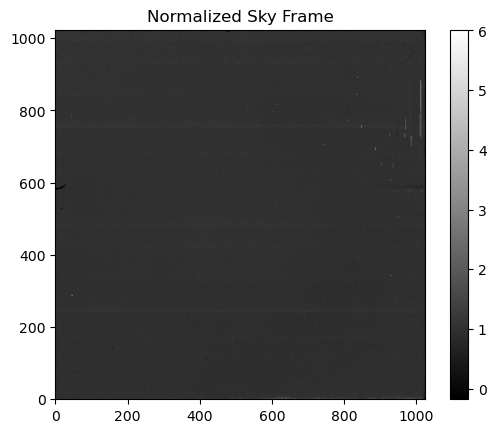

Normalization Factors:
11002.0
11195.0
10673.0
10696.0
11184.0
10761.0
10053.0
10054.0
9998.0


In [3]:
##### HW 7 START
# Print problem statement
print('Homework 7 - Problem 4')

# Import libraries
import numpy as np
import hw7_abigailglover_support_functions
from astropy.io import fits
import matplotlib.pyplot as plt

# Define the normalization region
norm_region = ((225, 225), (-225, -225))

# Call the normmedcomb function with the data and normalization region
median_combined, normalization_factors = hw7_abigailglover_support_functions.normmedcomb(objects_array, norm_region)

# Check that there are no stars left
#plt.imshow(median_combined, cmap='gray', origin='lower')
#plt.title('Normalized Sky Frame')
#plt.colorbar()
#plt.show()


# Save median_combined to the FITS file
fits.writeto('sky_13s_mednorm.fits', median_combined, overwrite=True)

# Print normalization factors
print("Normalization Factors:")
for factor in normalization_factors:
    print(factor)

